In [3]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [11]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260203/5_SiPM_ChannelsTest_Ch1-4_Ch2_QT_Thr20_Hys0_Background.csv'))
dfs.append(pd.read_csv('../data/260203/6_SiPM_ChannelsTest_Ch1-4_Ch6_QT_Thr20_Hys0_Background.csv'))
dfs.append(pd.read_csv('../data/260203/7_SiPM_ChannelsTest_Ch1-4_Ch10_QT_Thr20_Hys0_Background.csv'))
dfs.append(pd.read_csv('../data/260203/8_SiPM_ChannelsTest_Ch1-4_Ch14_QT_Thr20_Hys0_Background.csv'))

dfs[1]

,Detector,ID,Trigger,Time_sub,Time_sec,Time_gps,Temp,Ch1,Ch2,Ch3,...,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Argmax,Summed
0,5,505539,20,31549603,22333,42069,149,150,189,106,...,131,140,123,118,120,120,108,136,2,2056
1,5,505540,21,31581215,22333,42069,149,149,220,104,...,127,140,122,116,120,119,108,136,2,2071
2,5,505541,20,31581215,22333,42069,149,151,1413,106,...,131,143,125,118,122,120,108,137,2,3292
3,5,505542,21,31624379,22333,42069,149,149,895,105,...,129,139,124,119,120,120,108,136,2,2760
4,5,505543,21,31653407,22333,42069,149,150,268,104,...,129,142,122,118,120,120,108,135,2,2128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99897,5,605533,21,5460136,22729,42069,149,150,143,104,...,129,139,123,117,119,118,108,135,6,2047
99898,5,605534,21,5470594,22729,42069,149,149,142,104,...,131,141,124,118,120,119,108,135,6,2120
99899,5,605535,20,5470594,22729,42069,149,150,143,105,...,131,141,124,118,120,120,109,136,6,2164
99900,5,605536,21,5581244,22729,42069,149,150,143,105,...,130,139,123,118,120,120,108,135,4,2030


In [12]:
import matplotlib.pyplot as plt

N_BINS = 512
BITS_12 = 2**12

summed_spectra = [df['Summed'].tolist() for df in dfs]

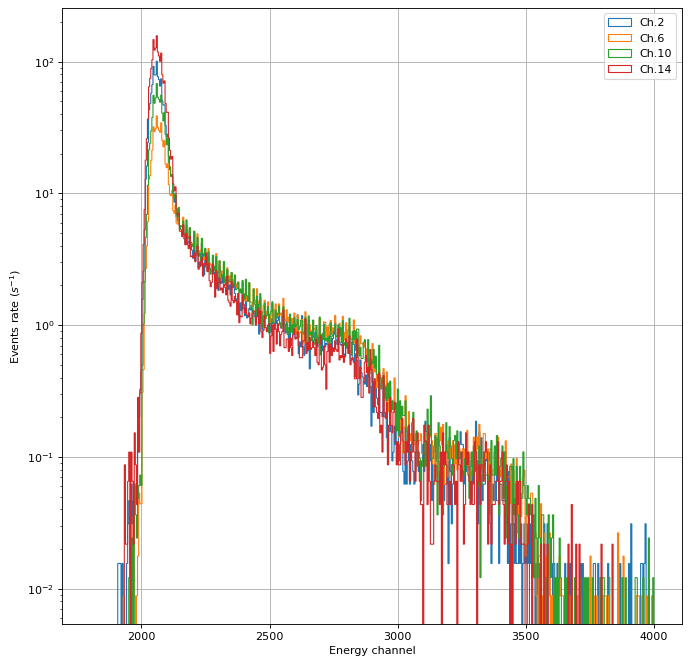

In [36]:
import numpy as np
times = [64.392, 113.229, 82.507, 45.958]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.2', 'Ch.6', 'Ch.10', 'Ch.14']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(1800, 4000), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Events rate ($s^{-1}$)')
# plt.xticks(np.arange(1800,4000,100))
plt.grid()
plt.show()

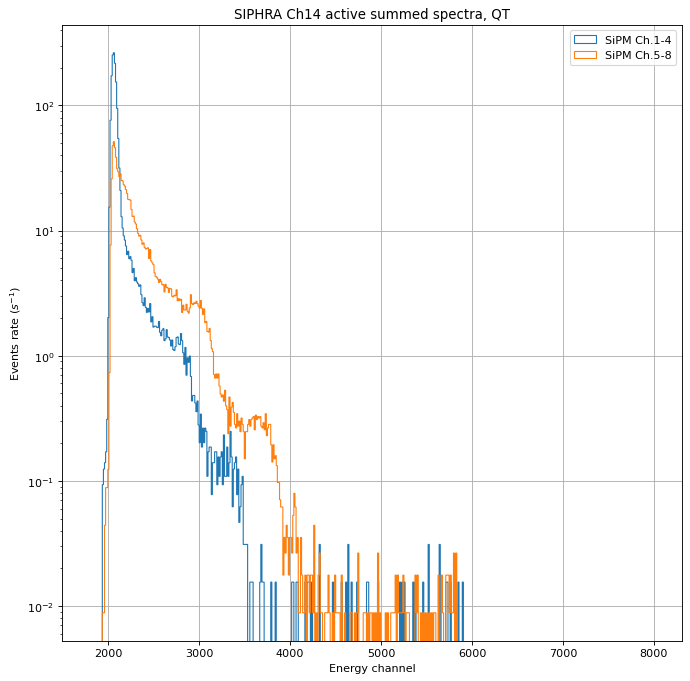

In [49]:
dfs.append(pd.read_csv('../data/260203/9_SiPM_ChannelsTest_Ch5-8_Ch14_QT_Thr20_Hys0_Background.csv'))
summed_spectra.append(dfs[4]['Summed'])
times_ch14 = [times[3], 137.539]
legend = ['SiPM Ch.1-4', 'SiPM Ch.5-8']
plt.figure(figsize=(10,10), dpi=80)
for idx,s in enumerate([summed_spectra[3],summed_spectra[4]]):
    plt.hist(s, N_BINS, range=(1800, 8000), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.title('SIPHRA Ch14 active summed spectra, QT')
plt.xlabel(r'Energy channel')
plt.ylabel(r'Events rate ($s^{-1}$)')
# plt.xticks(np.arange(1800,4000,100))
plt.grid()
plt.show()

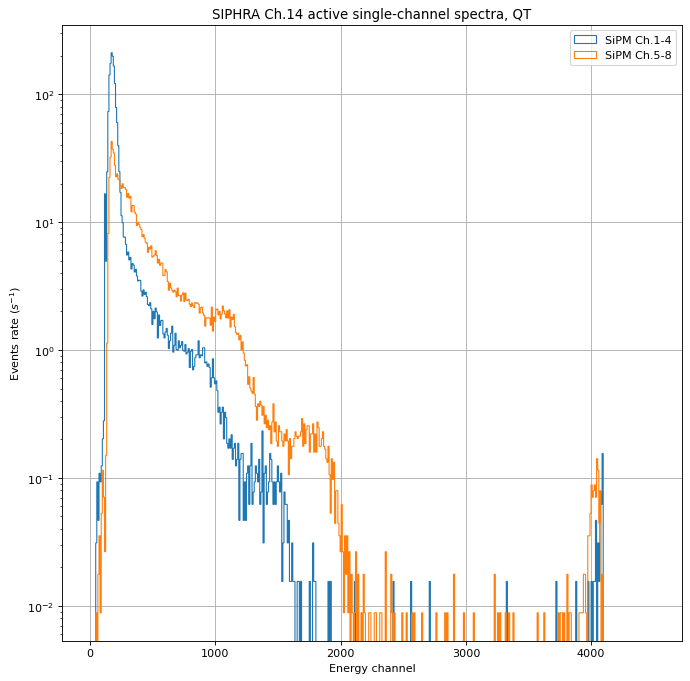

In [50]:
ch14_spectra = [dfs[3]['Ch14'], dfs[4]['Ch14']]
times_ch14 = [times[3], 137.539]
legend = ['SiPM Ch.1-4', 'SiPM Ch.5-8']
plt.figure(figsize=(10,10), dpi=80)
for idx,s in enumerate([ch14_spectra[0],ch14_spectra[1]]):
    plt.hist(s, N_BINS, range=(0, 4500), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.title('SIPHRA Ch.14 active single-channel spectra, QT')
plt.xlabel(r'Energy channel')
plt.ylabel(r'Events rate ($s^{-1}$)')
# plt.xticks(np.arange(1800,4000,100))
plt.grid()
plt.show()